# In this note book we will be analyzing ride sharing data.
# First we will examine a bubble plot displaying the relationship between average fare, total rides, total drivers, and city types.
# Then we will examine various pie charts including
# 1. Percent of total fares by city type
# 2. Percent of total rides by city type.
# 3. Percent of total drivers by city type.

In [93]:
%matplotlib inline

In [94]:
# We must first import relevant packages to this assignment.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [95]:
# Here we define where our data is located so that we can later use it.
city_data_csv_path = "Data/city_data.csv"
ride_data_csv_path = "Data/ride_data.csv"

In [96]:
# This creates dataframes using the data from our relevant csv files.
city_data = pd.read_csv(city_data_csv_path)
ride_data = pd.read_csv(ride_data_csv_path)

In [99]:
# Here we prview our city_data dataframe so we know what data it contains.
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [100]:
# Here we prview our ride_data dataframe so we know what data it contains.
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [103]:
# Here we merge our city_data and ride_data dataframes on the common column "city"
city_ride_merged_dataframe = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
city_ride_merged_dataframe.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## In this section we will create our bubble plot.

In [104]:
# Here we calculate the total rides per city for each city type.
# First we filter our merged dataframe by city type; then we group by city, and finally finally we count the number of entries in the ride_id column.
total_rides_per_city_urban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Urban"].groupby("city")["ride_id"].count()
total_rides_per_city_suburban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Suburban"].groupby("city")["ride_id"].count()
total_rides_per_city_rural = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Rural"].groupby("city")["ride_id"].count()

In [105]:
# Here we calculate the average fare per city for each city type.
# First we filter our merged dataframe by city type; then we group by city, and finally we find the mean of the fare column.
average_fare_per_city_urban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Urban"].groupby("city")["fare"].mean()
average_fare_per_city_suburban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Suburban"].groupby("city")["fare"].mean()
average_fare_per_city_rural = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Rural"].groupby("city")["fare"].mean()

In [106]:
# Here we calculate the total number of drivers per city for each city type.
# First we filter our merged dataframe by city type; then we group by city; and finally we find the sum of the driver_count column for each city.
total_drivers_per_city_urban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Urban"].groupby("city")["driver_count"].sum()
total_drivers_per_city_suburban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Suburban"].groupby("city")["driver_count"].sum()
total_drivers_per_city_rural = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Rural"].groupby("city")["driver_count"].sum()

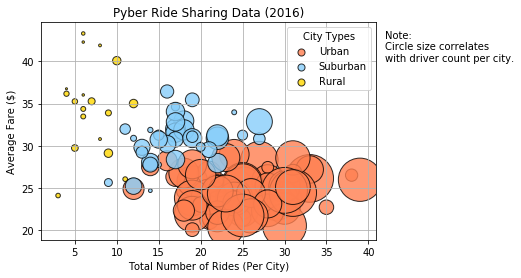

In [109]:
# Here define the data that will make up our bubble plot.
# The x-axis is defined by the total number of rides.
# The y-axis is defined by the average fare.
# The point size is defined be the total number of drivers per city.
# The colors differentiate different city types.
plt.scatter(total_rides_per_city_urban, average_fare_per_city_urban, s=total_drivers_per_city_urban, color = "coral", edgecolors = "black", alpha=0.8, label="Urban", linewidths=1)
plt.scatter(total_rides_per_city_suburban, average_fare_per_city_suburban, s=total_drivers_per_city_suburban, color = "lightskyblue", edgecolors="black", alpha=0.8, label="Suburban", linewidths=1)
plt.scatter(total_rides_per_city_rural, average_fare_per_city_rural, s=total_drivers_per_city_rural, color = "gold", edgecolors="black", alpha=0.8, label="Rural", linewidths=1)

# This gives our plot a title.
plt.title("Pyber Ride Sharing Data (2016)")

# This places a legend on our plot.
# The title paramaeter allows us to title the legend,
# and the loc parameter set to best places the legend in the area with the most blank space to avoid overlapping our plot points.
bubble_plot_legend = plt.legend(title="City Types", loc="best")

# This allows us to redefine the size of the icons in the legend.
# Without this, the icons would correspond to the general size of the points on the plot.
# That is, the Urban icon in the legend would be noticably larger than the the Suburban icon,
# and the Suburban icon would be noticably larger than the Rural icon.
bubble_plot_legend.legendHandles[0]._sizes = [50]
bubble_plot_legend.legendHandles[1]._sizes = [50]
bubble_plot_legend.legendHandles[2]._sizes = [50]

# The following lines define our axis titles.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# This allows us to add a note at the specified coordinates.
plt.text(42, 40, "Note:\nCircle size correlates\nwith driver count per city.")

# This adds a grid to the background.  Without this we would have a blank canvas.
plt.grid()

# This shows our plot and all adjustments made thereto.
plt.show()

## In this section, we will create three pie charts which summarize various percentages by city type.

### Here we will create a pie chart showing percen of total rides by city types.

In [110]:
# To find the percent of fares per city typ, we will first select only rows with the relevant city type
# Next we will calculate the sum of every value in the fare column
# Finally, we we will the sum of the fare column for the entire dataframe including every city type
percent_of_fares_urban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Urban"]["fare"].sum() / city_ride_merged_dataframe["fare"].sum()
percent_of_fares_suburban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Suburban"]["fare"].sum() / city_ride_merged_dataframe["fare"].sum()
percent_of_fares_rural = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Rural"]["fare"].sum() / city_ride_merged_dataframe["fare"].sum()

([<matplotlib.patches.Wedge at 0x1ea1a9a4710>,
 [Text(1.00749,0.651886,'Urban'),
  Text(-1.0204,0.410832,'Rural'),
  Text(-0.775574,-0.780054,'Suburban')],
 [Text(0.587705,0.380267,'62.7%'),
  Text(-0.556582,0.22409,'6.8%'),
  Text(-0.42304,-0.425484,'30.5%')])

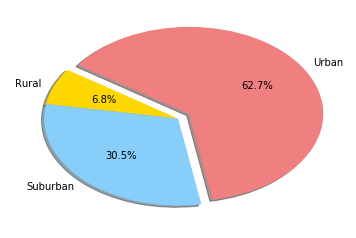

In [113]:
# Here we define a list containing the percentages of fares per city type to be used in a pie chart.
percent_of_fares_data = [percent_of_fares_urban, percent_of_fares_rural, percent_of_fares_suburban]

# Here we define the labels to be used on our pie chart.
percent_of_fares_labels = ["Urban", "Rural", "Suburban"]

# Here we explode the Urban part of the pie chart.
percent_of_fares_explode = (0.1, 0, 0)

# Here we define the colors of our pie chart to match the Pyber company's colors.
percent_of_fares_colors = ["lightcoral", "gold", "lightskyblue"]

# Here we use all the settings previous defined to create our pie chart.
# We add the additional setting of autopct="%0.1f%" to show the actual value for each part on the pie chart.  We also add a shadow to our chart.
plt.pie(percent_of_fares_data, autopct="%0.1f%%", labels = percent_of_fares_labels, explode=percent_of_fares_explode, colors=percent_of_fares_colors, startangle=280, shadow=True)